# SKLEARN - MODEL SELECTION : Train_test_split, Cross Validation, GridSearchCV

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

(150, 4)


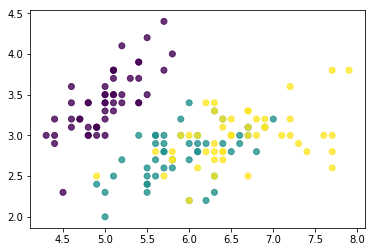

In [23]:
iris = load_iris()

X=iris.data
y=iris.target

print(X.shape)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

### TRAIN TEST SPLIT 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

print('train set',X_train.shape)
print('test_set',X_test.shape)

('train set', (120, 4))
('test_set', (30, 4))


Text(0.5,1,'test')

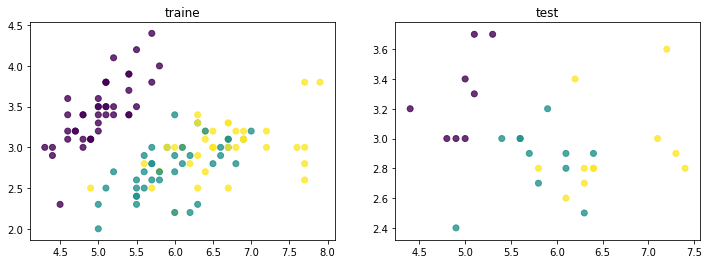

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.8)
plt.title('traine')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=0.8)
plt.title('test')

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train,y_train)
print('train score ', model.score(X_train,y_train))
print('test score ', model.score(X_test,y_test))

('train score ', 1.0)
('test score ', 0.9)


### AMELIORER LE MODEL === CROSS VALIDATION 

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5,scoring='accuracy').mean()

0.9745757575757577

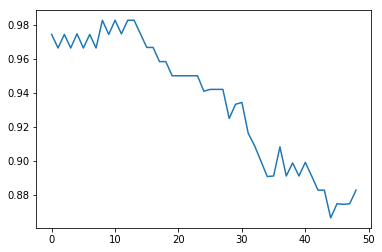

In [31]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv=5,scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)

### Validation curve

In [32]:
from sklearn.model_selection import validation_curve

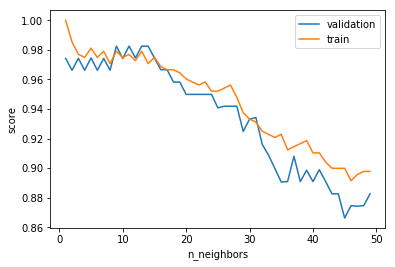

In [33]:
model = KNeighborsClassifier()
k = np.arange(1,50)
train_score , val_score = validation_curve(model , X_train,y_train,'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
grid.best_score_

0.9833333333333333

In [42]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [44]:
model = grid.best_estimator_
model.score(X_test,y_test)

0.9666666666666667

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

### courbe d'apprentisage == learning  cruve 

In [50]:
from sklearn.model_selection import learning_curve

In [52]:
N,train_score,val_score=learning_curve(model, X_train,y_train,train_sizes= np.linspace(0.1,1.0,10),cv=5)

In [53]:
N

array([ 9, 19, 28, 38, 47, 57, 66, 76, 85, 95])

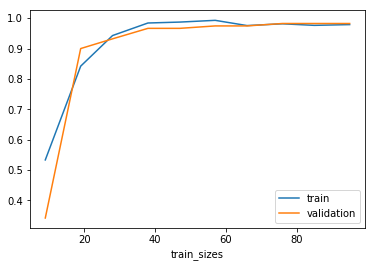

In [55]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()